In [1]:
from Hierarchy.PipelineFunctions.MainWorkers import FUNCOFMETHODS, times_when_method_better, NewRunExperiment, ReadLogs, MakeDendogram
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

/var/folders/7g/1dqbz5hx5994z2r91kw1_k2m0000gn/T/ipykernel_52832/3737549773.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
def generation(size, dim):
    norm_dist = sts.norm(0, 100)
    x = norm_dist.rvs(size).astype(int)

    if dim == 1:
        y = np.zeros(len(x))
    elif dim == 2:
        y = norm_dist.rvs(size).astype(int)

    points = list(zip(x, y))
    points = np.unique(points, axis=0)
    
    return np.array(points)

In [3]:
# euclidean - евклидово
# cityblock - манхэттена
# chebyshev - чевышева

dist_metric = 'chebyshev'
dim = 1

now = NewRunExperiment(6000, generation, 5, 1000, FUNCOFMETHODS, dist_metric, dim)
now

100%|██████████| 1/1 [00:00<00:00, 77.87it/s]


'1dim-chebyshev-5-1 2023-04-24 12:20:48'

In [ ]:
# now = '1dim-chebyshev-5-1.0k 2023-04-24 01:34:39'

In [4]:
dist_metric = now.split("-")[1]
ndim = now.split("-")[0]

TimeLogsList, Ultradists, SamplesList, MaxList, SumList, NameOfMethodList, NormDiff = ReadLogs(now)

In [5]:
# ПРОВЕРКА НА МОНОТОННОСТЬ

flag = 0
for num, ultra in enumerate(Ultradists):
    if sorted(ultra) != ultra:
        print(f"Пример номер {NameOfMethodList[num]}: {num}")
        print(ultra)
        print()
        flag = 1
if flag != 1:
    display(HTML('<h2>The methods is monotonous</h2>'))

In [6]:
MaxMatrix = pd.DataFrame({'MetricsByMethodsForMax': MaxList, 'NameOfMethod': NameOfMethodList})

grouper = MaxMatrix.groupby('NameOfMethod')
ResultsForMax = pd.concat([pd.Series(v['MetricsByMethodsForMax'].tolist(), name=k) for k, v in grouper], axis=1)

ResultsForMax.head()

,complete_linked,group_average_linked,median_linked,min_max_linked,single_linked,weighted_average_linked
0,207.0,117.333333,145.0,103.5,207.0,116.25


In [7]:
SumMatrix = pd.DataFrame({'MetricsByMethodsForSum': SumList, 'NameOfMethod': NameOfMethodList})

grouper = SumMatrix.groupby('NameOfMethod')
ResultsForSum = pd.concat([pd.Series(v['MetricsByMethodsForSum'].tolist(), name=k) for k, v in grouper], axis=1)

ResultsForSum.head()

,complete_linked,group_average_linked,median_linked,min_max_linked,single_linked,weighted_average_linked
0,117.8,95.266667,88.6,100.8,151.0,105.9


<AxesSubplot: >

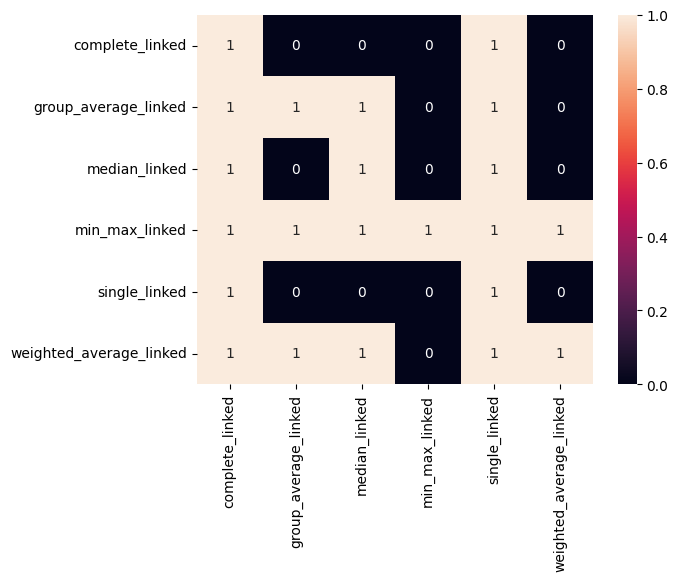

In [8]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

In [9]:
for col in ResultsForMax.columns:
    print(col)
    print(list(ResultsForMax.query(f"min_max_linked > {col}").index))
    print()

complete_linked
[]

group_average_linked
[]

median_linked
[]

min_max_linked
[]

single_linked
[]

weighted_average_linked
[]



<AxesSubplot: >

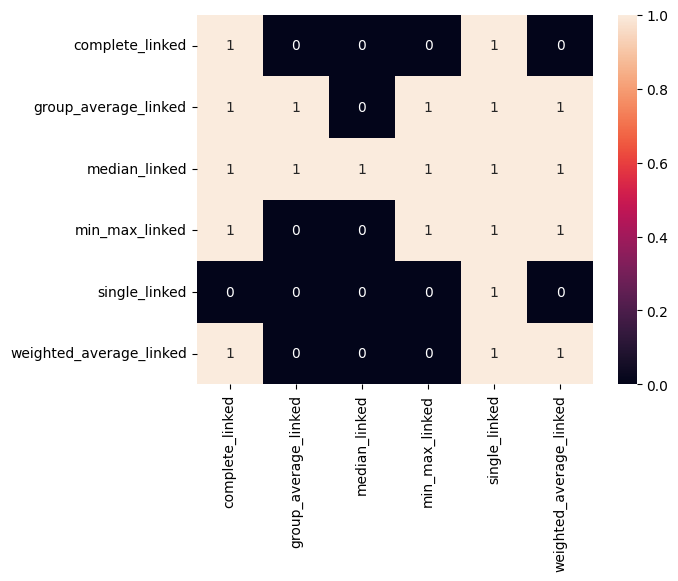

In [10]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)

## Анализ

In [12]:
test_data = SamplesList[0]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,183.0,0.0
1,-2.0,0.0
2,-165.0,0.0
3,132.0,0.0
4,-187.0,0.0


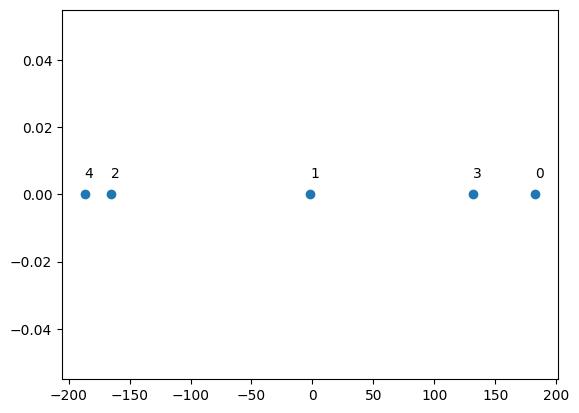

In [13]:
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.005, str(i))

In [14]:
from Hierarchy.MinMaxMethod import MinMaxHierarchy

min_max_res = MinMaxHierarchy(test_data, logs_turn_on=True, metric=dist_metric)

Distance matrix: 0 step
       0      1      2      3      4
0    0.0  185.0  348.0   51.0  370.0
1  185.0    0.0  163.0  134.0  185.0
2  348.0  163.0    0.0  297.0   22.0
3   51.0  134.0  297.0    0.0  319.0
4  370.0  185.0   22.0  319.0    0.0

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(2, 4)', '0', '1', '3'], dtype='<U25'))
Distance matrix: 1 step
        (2, 4)      0      1      3
(2, 4)     0.0  359.0  174.0  308.0
0        359.0    0.0  185.0   51.0
1        174.0  185.0    0.0  134.0
3        308.0   51.0  134.0    0.0



('Clusters:', array(['(0, 3)', '(2, 4)', '1'], dtype='<U25'))
Distance matrix: 2 step
        (0, 3)  (2, 4)      1
(0, 3)     0.0   333.5  159.5
(2, 4)   333.5     0.0  174.0
1        159.5   174.0    0.0



('Clusters:', array(['((0, 3), 1)', '(2, 4)'], dtype='<U25'))
Distance matrix: 3 step
             ((0, 3), 1)  (2, 4)
((0, 3), 1)          0.0   266.5
(2, 4)             266.5     0.0



('Clusters:', array(['(((0, 3), 1), (2, 4))'], dtype='

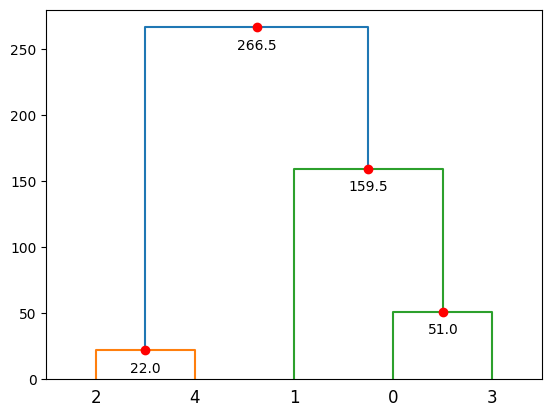

In [15]:
MakeDendogram(test_data, min_max_res[2])

In [16]:
from Hierarchy.StandartMethods import hierarchy
from Hierarchy.ToCulcMethods.Linkages import group_average_linked
from Hierarchy.ToCulcMethods.Linkages import single_linked

group_average_res = hierarchy(test_data, metric=dist_metric, method=group_average_linked, logs_turn_on=True)

Distance matrix: 0 step
       0      1      2      3      4
0    0.0  185.0  348.0   51.0  370.0
1  185.0    0.0  163.0  134.0  185.0
2  348.0  163.0    0.0  297.0   22.0
3   51.0  134.0  297.0    0.0  319.0
4  370.0  185.0   22.0  319.0    0.0

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(2, 4)', '0', '1', '3'], dtype='<U25'))
Distance matrix: 1 step
       0      1      2      3
0    0.0  359.0  174.0  308.0
1  359.0    0.0  185.0   51.0
2  174.0  185.0    0.0  134.0
3  308.0   51.0  134.0    0.0



('Clusters:', array(['(0, 3)', '(2, 4)', '1'], dtype='<U25'))
Distance matrix: 2 step
       0      1      2
0    0.0  333.5  159.5
1  333.5    0.0  174.0
2  159.5  174.0    0.0



('Clusters:', array(['((0, 3), 1)', '(2, 4)'], dtype='<U25'))
Distance matrix: 3 step
            0           1
0    0.000000  280.333333
1  280.333333    0.000000



('Clusters:', array(['(((0, 3), 1), (2, 4))'], dtype='<U25'))
Distance matrix: 4 step
     0
0  0.0





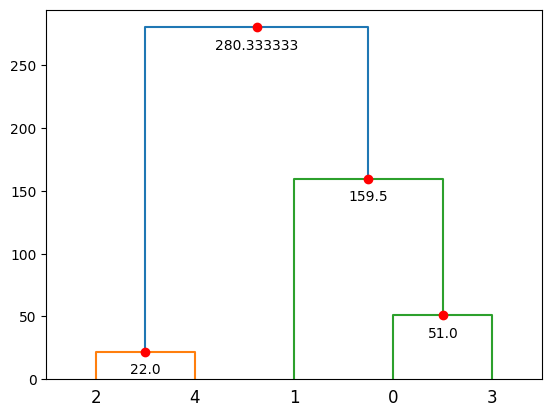

In [17]:
MakeDendogram(test_data, group_average_res[2])